In [8]:
import geopandas as gpd
import csv
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from matplotlib.colors import ListedColormap
import pandas as pd

warnings. filterwarnings('ignore')

In [9]:
census = gpd.read_file('data/nz_census/2018-census-individual-part-1-total-new-zealand-by-statistic.shp')


In [ ]:
### nz born 


rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 




slr_data = gpd.read_file('data/clipped_census/'+ regional_name + '/' + '{}'.format(file))
slr_data = slr_data.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
pop_exposed_nz = slr_data['C18_Birthp'].sum()
people_exposed_nz.append(pop_exposed_nz)
people_exposed_nz.sort()
pop_exposed_oe = slr_data['C18_Birt_1'].sum()
people_exposed_oe.append(pop_exposed_oe)
people_exposed_oe.sort()
            
rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
year = rcps[:,0]

rcp2mean = rcps[:,1]
rcp2mean = rcp2mean*10
rcp8mean = rcps[:,4]
rcp8mean = rcp8mean*10
rcp2_exp_nz = []
rcp8_exp_nz = []
rcp2_exp_oe = []
rcp8_exp_oe = []

for count in range(0,len(year)):
    rcp2_exp_nz.append(people_exposed_nz[int(rcp2mean[count])])
    rcp8_exp_nz.append(people_exposed_nz[int(rcp8mean[count])])
    rcp2_exp_oe.append(people_exposed_oe[int(rcp2mean[count])])
    rcp8_exp_oe.append(people_exposed_oe[int(rcp8mean[count])])

        
exposure_table = {'nz born rcp 2':  rcp2_exp_nz, 'oe born rcp 2': rcp2_exp_oe,'nz born rcp 8':  rcp8_exp_nz, 'oe born rcp 8': rcp8_exp_oe}
df= pd.DataFrame(data=exposure_table)
df.to_csv('result_tables/number/exposure table for nz born in '+regional_name +'.csv')
    
   
 plt.figure()
sns.set_palette(sns.color_palette("Set2"))
plt.plot(year, rcp2_exp_nz, label="NZ Born - RCP 2.6")

plt.plot(year, rcp8_exp_nz, label="NZ Born - RCP 8")
plt.plot(year, rcp2_exp_oe, label="Overseas Born - RCP 2.6")
plt.plot(year, rcp8_exp_oe, label="Overseas Born - RCP 8")
plt.title('Number of ppl in ' + rc_names[rc] )
plt.xlabel("Years")
plt.ylabel("People Exposed")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('report/number/no_ nz born ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()


In [2]:

rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 




for rc in range(0,14,1):
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    people_exposed = []

    for file in os.listdir("data/clipped_census/"+regional_name):
        if file.endswith(".shp"):
            slr_data = gpd.read_file('data/clipped_census/'+ regional_name + '/' + '{}'.format(file))
            slr_data = slr_data.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
            pop_exposed = slr_data['C18_CURPop'].sum()
            people_exposed.append(pop_exposed)
            people_exposed.sort()
            
        rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean = rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean = rcp8mean*10
    rcp2_exp = []
    rcp8_exp = []

    for count in range(0,len(year)):
        rcp2_exp.append(people_exposed[int(rcp2mean[count])])
        rcp8_exp.append(people_exposed[int(rcp8mean[count])])

    mean = [0.07,0.12,0.17,0.23,0.29,0.35,0.41,0.47,0.53,0.59,0.64]
    std_upper = [0.02105,0.0417,0.0625,0.0833,0.104,0.125,0.1458,0.167,0.1875,0.208,0.21875]

    nsim = 1000
    rcp2_lower = []
    rcp2_upper = []

    for num in range(len(mean)):
        mu = mean[num]
        std = std_upper[num]
        slr = []
        for i in range(nsim): 
            x = np.random.normal(mu,std)
            slr.append(x)

        mean_slr = np.mean(slr)
        slr_lower = np.percentile(slr,5)
        slr_upper = np.percentile(slr,95)
        rcp2_lower.append(slr_lower *10)
        rcp2_upper.append(slr_upper*10)

   
   
    mean8 = [0.08,0.13,0.19,0.26,0.34,0.42,0.52,0.61,0.75,0.88,1]
    std_upper8 = [0.03158,0.042,0.063,0.0947,0.1158,0.147,0.1789,0.21,0.263,0.305,0.347]
    nsim = 1000
    rcp8_lower = []
    rcp8_upper = []

    for num in range(len(mean8)):
        mu = mean8[num]
        std = std_upper8[num]
        slr = [] 
        for i in range(nsim): 
            x = np.random.normal(mu,std)
            slr.append(x)

        mean_slr = np.mean(slr)
        slr_lower = np.percentile(slr,5)
        slr_upper = np.percentile(slr,95)
        rcp8_lower.append(slr_lower *10)
        rcp8_upper.append(slr_upper*10)

    rcp8_lowexp = []
    rcp8_upexp = []
    rcp2_lowexp = []
    rcp2_upexp = []

    for count in range(len(year)):
        rcp2_lowexp.append(people_exposed[int(round(rcp2_lower[count]))])
        rcp2_upexp.append(people_exposed[int(round(rcp2_upper[count]))])
        rcp8_lowexp.append(people_exposed[int(round(rcp8_lower[count]))])
        rcp8_upexp.append(people_exposed[int(round(rcp8_upper[count]))])
        
    data_rcp2 = {'mean 2':  rcp2_exp, 'lower 2': rcp2_lowexp, 'upper 2':rcp2_upexp, 'mean 8':rcp8_exp, 'lower 8':  rcp8_lowexp, 'upper 8': rcp8_upexp}
    df= pd.DataFrame(data=data_rcp2)
    df.to_csv('result_tables/number/exposure table for number in '+regional_name +'.csv')


        
    plt.figure()
    plt.plot(year, rcp2_exp, label="RCP 2.6", color='violet')
    plt.plot(year, rcp8_exp, label="RCP 8", color='lightblue')
    plt.fill_between(year,rcp2_lowexp,rcp2_upexp, facecolor='violet', alpha=0.2)
    plt.fill_between(year,rcp8_lowexp,rcp8_upexp, facecolor='lightblue', alpha=0.2)
    plt.title('Number of people exposed in ' + rc_names[rc] + ' over time with different RCPs')
    plt.xlabel("Years")
    plt.ylabel("People Exposed")
    plt.legend(loc= 'upper left')
    
plt.show()


KeyboardInterrupt: 

In [ ]:
plt.savefig('report/number/no_ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    

In [ ]:
### nz born 


rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 




for rc in range(0,14,1):
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    people_exposed_nz = []
    people_exposed_oe = []
    for file in os.listdir("data/clipped_census/"+regional_name):
        if file.endswith(".shp"):
            slr_data = gpd.read_file('data/clipped_census/'+ regional_name + '/' + '{}'.format(file))
            slr_data = slr_data.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
            pop_exposed_nz = slr_data['C18_Birthp'].sum()
            people_exposed_nz.append(pop_exposed_nz)
            people_exposed_nz.sort()
            pop_exposed_oe = slr_data['C18_Birt_1'].sum()
            people_exposed_oe.append(pop_exposed_oe)
            people_exposed_oe.sort()
            
        rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean = rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean = rcp8mean*10
    rcp2_exp_nz = []
    rcp8_exp_nz = []
    rcp2_exp_oe = []
    rcp8_exp_oe = []

    for count in range(0,len(year)):
        rcp2_exp_nz.append(people_exposed_nz[int(rcp2mean[count])])
        rcp8_exp_nz.append(people_exposed_nz[int(rcp8mean[count])])
        rcp2_exp_oe.append(people_exposed_oe[int(rcp2mean[count])])
        rcp8_exp_oe.append(people_exposed_oe[int(rcp8mean[count])])

        
    exposure_table = {'nz born rcp 2':  rcp2_exp_nz, 'oe born rcp 2': rcp2_exp_oe,'nz born rcp 8':  rcp8_exp_nz, 'oe born rcp 8': rcp8_exp_oe}
    df= pd.DataFrame(data=exposure_table)
    df.to_csv('result_tables/number/exposure table for nz born in '+regional_name +'.csv')
    
   
    plt.figure()
    sns.set_palette(sns.color_palette("Set2"))
    plt.plot(year, rcp2_exp_nz, label="NZ Born - RCP 2.6")
    plt.plot(year, rcp8_exp_nz, label="NZ Born - RCP 8")
    plt.plot(year, rcp2_exp_oe, label="Overseas Born - RCP 2.6")
    plt.plot(year, rcp8_exp_oe, label="Overseas Born - RCP 8")
    plt.title('Number of ppl in ' + rc_names[rc] )
    plt.xlabel("Years")
    plt.ylabel("People Exposed")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('report/number/no_ nz born ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()


In [ ]:
### maori descent


rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 




for rc in range(0,14,1):
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    people_exposed_maori = []
    people_exposed_no_maori = []
    for file in os.listdir("data/clipped_census/"+regional_name):
        if file.endswith(".shp"):
            slr_data = gpd.read_file('data/clipped_census/'+ regional_name + '/' + '{}'.format(file))
            slr_data = slr_data.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
            pop_exposed_maori = slr_data['C18_Maori_'].sum()
            people_exposed_maori.append(pop_exposed_maori)
            people_exposed_maori.sort()
            pop_exposed_no_maori = slr_data['C18_Maor_1'].sum()
            people_exposed_no_maori.append(pop_exposed_no_maori)
            people_exposed_no_maori.sort()
            
        rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean = rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean = rcp8mean*10
    rcp2_exp_maori = []
    rcp8_exp_maori = []
    rcp2_exp_no_maori = []
    rcp8_exp_no_maori = []

    for count in range(0,len(year)):
        rcp2_exp_maori.append(people_exposed_maori[int(rcp2mean[count])])
        rcp8_exp_maori.append(people_exposed_maori[int(rcp8mean[count])])
        rcp2_exp_no_maori.append(people_exposed_no_maori[int(rcp2mean[count])])
        rcp8_exp_no_maori.append(people_exposed_no_maori[int(rcp8mean[count])])
    
    
    exposure_table = {'maori  rcp 2':  rcp2_exp_maori, 'no maori rcp 2': rcp2_exp_no_maori,'maori rcp 8':  rcp8_exp_maori, 'no maor in rcp 8': rcp8_exp_no_maori}
    df= pd.DataFrame(data=exposure_table)
    df.to_csv('result_tables/number/exposure table for Māori descent in '+regional_name +'.csv')
    

        
    plt.figure()
    plt.plot(year, rcp2_exp_maori, label="Māori Descent - RCP 2.6", color='lightgreen')
    plt.plot(year, rcp8_exp_maori, label="Māori Descent - RCP 8", color='lightblue')
    plt.plot(year, rcp2_exp_no_maori, label=" No Māori Descent - RCP 2.6", color='violet')
    plt.plot(year, rcp8_exp_no_maori, label="No Māori Descent - RCP 8", color='orange')
    plt.title('Number of pp Māori descent exposed in ' + rc_names[rc] )
    plt.xlabel("Years")
    plt.ylabel("People Exposed")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()    
    plt.savefig('report/number/no_maori descent ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()


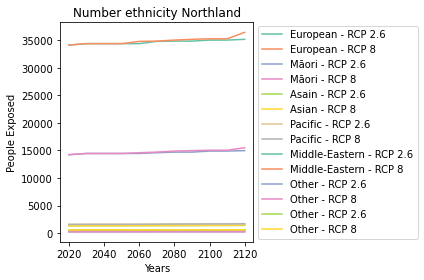

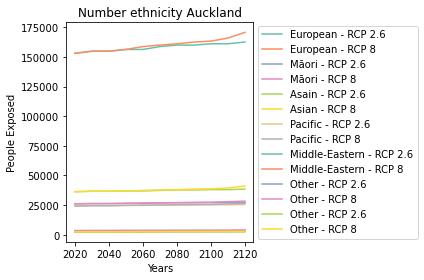

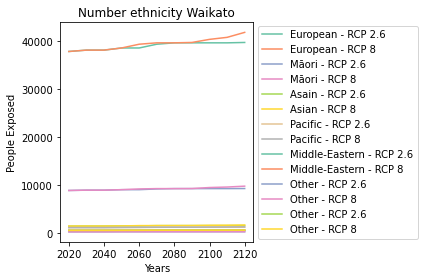

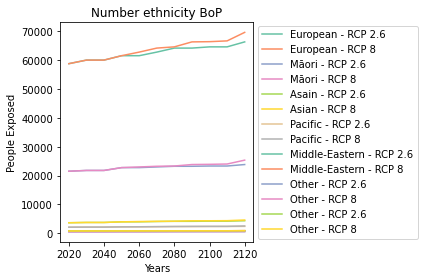

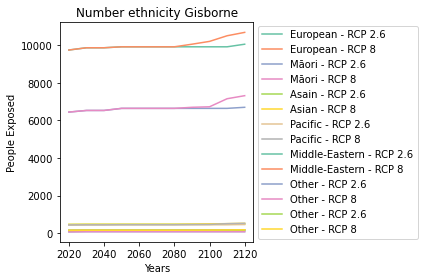

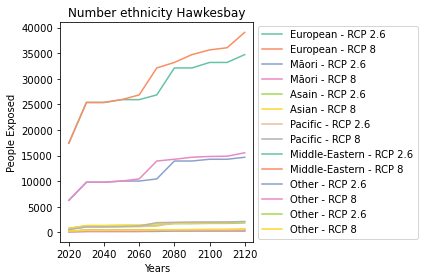

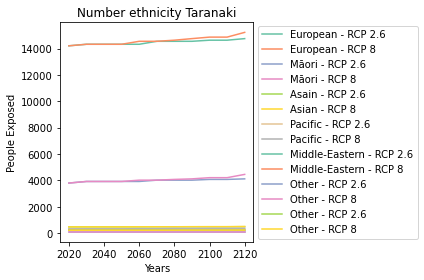

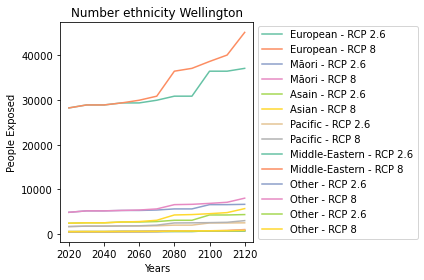

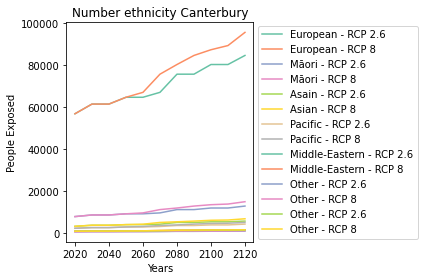

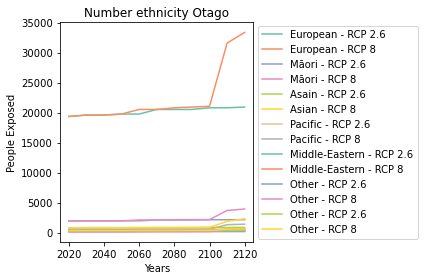

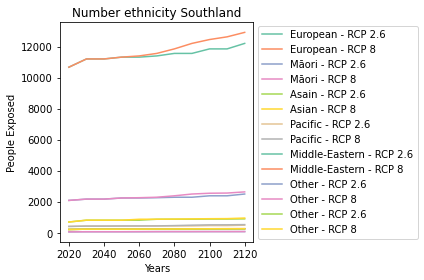

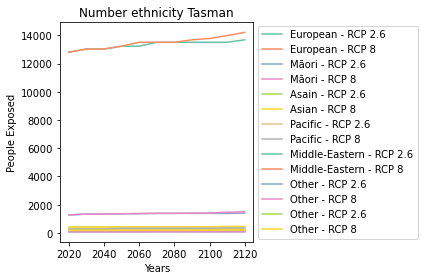

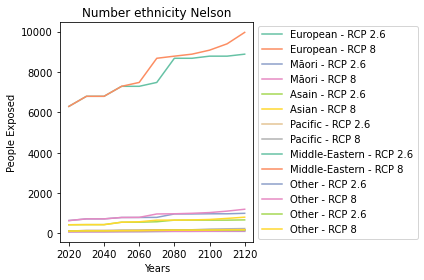

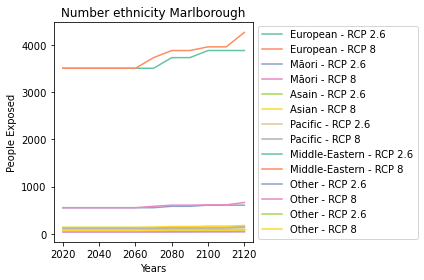

In [5]:
### ethnicity 


rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 





for rc in range(0,14,1):
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    people_exposed_european = []
    people_exposed_maori = []
    people_exposed_asain = []
    people_exposed_pacific_peoples = []
    people_exposed_other_ethnicity = []
    people_exposed_middle_eastern = []
    people_exposed_other = []
    for file in os.listdir("data/clipped_census/"+regional_name):
        if file.endswith(".shp"):
            slr_data = gpd.read_file('data/clipped_census/'+ regional_name + '/' + '{}'.format(file))
            slr_data = slr_data.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
            pop_exposed_european = slr_data['C18_Ethnic'].sum()
            people_exposed_european.append(pop_exposed_european)
            people_exposed_european.sort()
            pop_exposed_maori = slr_data['C18_Ethn_1'].sum()
            people_exposed_maori.append(pop_exposed_maori)
            people_exposed_maori.sort()
            pop_exposed_asain = slr_data['C18_Ethn_3'].sum()
            people_exposed_asain.append(pop_exposed_asain)
            people_exposed_asain.sort()
            pop_exposed_pacific_peoples = slr_data['C18_Ethn_2'].sum()
            people_exposed_pacific_peoples.append(pop_exposed_pacific_peoples)
            people_exposed_pacific_peoples.sort()
            pop_exposed_other_ethnicity = slr_data['C18_Ethn_5'].sum()
            people_exposed_other_ethnicity.append(pop_exposed_other_ethnicity)
            people_exposed_other_ethnicity.sort()
            pop_exposed_middle_eastern = slr_data['C18_Ethn_4'].sum()
            people_exposed_middle_eastern.append(pop_exposed_middle_eastern)
            people_exposed_middle_eastern.sort()
            pop_exposed_other = slr_data['C18_Ethn_5'].sum()
            people_exposed_other.append(pop_exposed_other)
            people_exposed_other.sort()
            
        rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean = rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean = rcp8mean*10
    rcp2_exp_european = []
    rcp8_exp_european = []
    rcp2_exp_maori = []
    rcp8_exp_maori = []
    rcp2_exp_asain = []
    rcp8_exp_asain = []
    rcp2_exp_pacific_peoples = []
    rcp8_exp_pacific_peoples = []
    rcp2_exp_other_ethnicity = []
    rcp8_exp_other_ethnicity = []
    rcp2_exp_middle_eastern = []
    rcp8_exp_middle_eastern = []
    rcp2_exp_other = []
    rcp8_exp_other = []
    

    for count in range(0,len(year)):
        rcp2_exp_european.append(people_exposed_european[int(rcp2mean[count])])
        rcp8_exp_european.append(people_exposed_european[int(rcp8mean[count])])
        rcp2_exp_maori.append(people_exposed_maori[int(rcp2mean[count])])
        rcp8_exp_maori.append(people_exposed_maori[int(rcp8mean[count])])
        rcp2_exp_asain.append(people_exposed_asain[int(rcp2mean[count])])
        rcp8_exp_asain.append(people_exposed_asain[int(rcp8mean[count])])
        rcp2_exp_pacific_peoples.append(people_exposed_pacific_peoples[int(rcp2mean[count])])
        rcp8_exp_pacific_peoples.append(people_exposed_pacific_peoples[int(rcp8mean[count])])
        rcp2_exp_other_ethnicity.append(people_exposed_other_ethnicity[int(rcp2mean[count])])
        rcp8_exp_other_ethnicity.append(people_exposed_other_ethnicity[int(rcp8mean[count])])
        rcp2_exp_middle_eastern.append(people_exposed_middle_eastern[int(rcp2mean[count])])
        rcp8_exp_middle_eastern.append(people_exposed_middle_eastern[int(rcp8mean[count])])
        rcp2_exp_other.append(people_exposed_other[int(rcp2mean[count])])
        rcp8_exp_other.append(people_exposed_other[int(rcp8mean[count])])
        
        
    data_rcp2 = {'European rcp 2':  rcp2_exp_european, 'Maori rcp 2': rcp2_exp_maori, 'Pacific rcp 2':rcp2_exp_pacific_peoples, 'Asain rcp 2':rcp2_exp_asain, 'middle eastern  rcp 2':  rcp2_exp_middle_eastern, 'other rcp 2': rcp2_exp_other, 'European rcp 8':  rcp8_exp_european, 'Maori rcp 8': rcp8_exp_maori, 'pacific rcp 8':rcp8_exp_pacific_peoples, 'Asain rcp 8':rcp8_exp_asain, 'middle eastern  rcp 8':  rcp8_exp_middle_eastern, 'other rcp 8': rcp8_exp_other}
    df= pd.DataFrame(data=data_rcp2)
    df.to_csv('result_tables/number/exposure table for ethnicity in '+regional_name +'.csv')

        
    plt.figure()
    sns.set_palette(sns.color_palette("Set2"))
    plt.plot(year, rcp2_exp_european, label="European - RCP 2.6")
    plt.plot(year, rcp8_exp_european, label="European - RCP 8")
    plt.plot(year, rcp2_exp_maori, label="Māori - RCP 2.6")
    plt.plot(year, rcp8_exp_maori, label="Māori - RCP 8")
    plt.plot(year, rcp2_exp_asain, label="Asain - RCP 2.6")
    plt.plot(year, rcp8_exp_asain, label="Asian - RCP 8")
    plt.plot(year, rcp2_exp_pacific_peoples, label="Pacific - RCP 2.6")
    plt.plot(year, rcp8_exp_pacific_peoples, label="Pacific - RCP 8")
    plt.plot(year, rcp2_exp_other_ethnicity, label="Middle-Eastern - RCP 2.6")
    plt.plot(year, rcp8_exp_other_ethnicity, label="Middle-Eastern - RCP 8")
    plt.plot(year, rcp2_exp_middle_eastern, label="Other - RCP 2.6")
    plt.plot(year, rcp8_exp_middle_eastern, label="Other - RCP 8")
    plt.plot(year, rcp2_exp_other, label="Other - RCP 2.6")
    plt.plot(year, rcp8_exp_other, label="Other - RCP 8")
    
    
    plt.title('Number ethnicity ' + rc_names[rc])
    plt.xlabel("Years")
    plt.ylabel("People Exposed")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('report/number/no_ethnicity of ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()


In [ ]:

rc_names  = ['Northland', 'Auckland', 'Waikato', 'BoP', 'Gisborne','Hawkesbay','Taranaki', 'Wellington','Canterbury','Otago','Southland','Tasman','Nelson','Marlborough', 'Horizons'] 
rc_names_l  = ['northland', 'akl', 'waikato', 'bop', 'gisborne','HB','taranaki', 'wlg','cant','Otago','Southland','Tasman','Nelson','Marlborough', 'horizons'] 




for rc in range(0,14,1):
    regional_name = rc_names[rc]
    regional_name_l = rc_names_l[rc]
    people_exposed_ages_1_to_14 = []
    people_exposed_ages_15_to_29 = []
    people_exposed_ages_30_to_64 = []
    people_exposed_ages_65_and_over = []
    for file in os.listdir("data/clipped_census/"+regional_name):
        if file.endswith(".shp"):
            slr_data = gpd.read_file('data/clipped_census/'+ regional_name + '/' + '{}'.format(file))
            slr_data = slr_data.replace(['C', -999, -998, '0', '..', 'Mainland'], 0).sum()
            pop_exposed_ages_1_to_14 = slr_data['C18_Agelif'].sum()
            people_exposed_ages_1_to_14.append(pop_exposed_ages_1_to_14)
            people_exposed_ages_1_to_14.sort()
            pop_exposed_ages_15_to_29 = slr_data['C18_Agel_1'].sum()
            people_exposed_ages_15_to_29.append(pop_exposed_ages_15_to_29)
            people_exposed_ages_15_to_29.sort()
            pop_exposed_ages_30_to_64 = slr_data['C18_Agel_2'].sum()
            people_exposed_ages_30_to_64.append(pop_exposed_ages_30_to_64)
            people_exposed_ages_30_to_64.sort()
            pop_exposed_ages_65_and_over = slr_data['C18_Agel_3'].sum()
            people_exposed_ages_65_and_over.append(pop_exposed_ages_65_and_over)
            people_exposed_ages_65_and_over.sort()
            
        rcps = np.loadtxt('data/hazards/slr_projection.csv', delimiter=',', skiprows=2)
    year = rcps[:,0]

    rcp2mean = rcps[:,1]
    rcp2mean = rcp2mean*10
    rcp8mean = rcps[:,4]
    rcp8mean = rcp8mean*10
    rcp2_exp_ages_1_to_14 = []
    rcp8_exp_ages_1_to_14 = []
    rcp2_exp_ages_15_to_29 = []
    rcp8_exp_ages_15_to_29 = []
    rcp2_exp_ages_30_to_64 = []
    rcp8_exp_ages_30_to_64 = []
    rcp2_exp_ages_65_and_over = []
    rcp8_exp_ages_65_and_over = []

    for count in range(0,len(year)):
        rcp2_exp_ages_1_to_14.append(people_exposed_ages_1_to_14[int(rcp2mean[count])])
        rcp8_exp_ages_1_to_14.append(people_exposed_ages_1_to_14[int(rcp8mean[count])])
        rcp2_exp_ages_15_to_29.append(people_exposed_ages_15_to_29[int(rcp2mean[count])])
        rcp8_exp_ages_15_to_29.append(people_exposed_ages_15_to_29[int(rcp8mean[count])])
        rcp2_exp_ages_30_to_64.append(people_exposed_ages_30_to_64[int(rcp2mean[count])])
        rcp8_exp_ages_30_to_64.append(people_exposed_ages_30_to_64[int(rcp8mean[count])])
        rcp2_exp_ages_65_and_over.append(people_exposed_ages_65_and_over[int(rcp2mean[count])])
        rcp8_exp_ages_65_and_over.append(people_exposed_ages_65_and_over[int(rcp8mean[count])])

    data_rcp2 = {'1-14 rcp 2':  rcp2_exp_ages_1_to_14, '15-29 rcp 2': rcp2_exp_ages_15_to_29, '30-54 rcp 2':rcp2_exp_ages_30_to_64, '65+ rcp 2':rcp2_exp_ages_65_and_over,
    '1-14 rcp 8':  rcp8_exp_ages_1_to_14, '15-29 rcp 8': rcp8_exp_ages_15_to_29, '30-54 rcp 8':rcp8_exp_ages_30_to_64, '65+ rcp 8':rcp8_exp_ages_65_and_over}
    df= pd.DataFrame(data=data_rcp2)
    df.to_csv('result_tables/number/exposure table for ages in '+regional_name +'.csv')

        
    plt.figure()
    sns.set_palette(sns.color_palette("Set2"))
    plt.plot(year, rcp2_exp_ages_1_to_14, label="ages 1 to 14 - RCP 2.6")
    plt.plot(year, rcp8_exp_ages_1_to_14, label="ages 1 to 14 - RCP 8")
    plt.plot(year, rcp2_exp_ages_15_to_29, label="ages 15 to 29 - RCP 2.6")
    plt.plot(year, rcp8_exp_ages_15_to_29, label="ages 15 to 29 - RCP 8")
    plt.plot(year, rcp2_exp_ages_30_to_64, label="ages 30 to 64 - RCP 2.6")
    plt.plot(year, rcp8_exp_ages_30_to_64, label="ages 30 to 64 - RCP 8")
    plt.plot(year, rcp2_exp_ages_65_and_over, label="ages 65 and over - RCP 2.6")
    plt.plot(year, rcp8_exp_ages_65_and_over, label="ages 65 and over - RCP 8")
    
    plt.title('Number ppl ages ' + rc_names[rc])
    plt.xlabel("Years")
    plt.ylabel("People Exposed")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('report/number/no_ages ppl_exposed_in ' +rc_names[rc]+ '.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)
    
plt.show()
